In [1]:
!pip install umap-learn
!pip install datashader 
!pip install bokeh
!pip install holoviews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=65b32697f9c2c20cb57bc570939d17205d9a864cc2c37b8a6a3c08bc5db40361
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=79a46803375fa12f8ed746f3b3cc67ceb19288f14ee929f151df04ff6351acfe
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/pu

In [2]:
!pip install velocyto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 68.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 38.0 MB/s eta 0:00:00
  Created wheel for velocyto: filename=velocyto-0.17.17-cp38-cp38-linux_x86_64.whl size=498913 sha256=47a578c9fd0f6fcf17ed0d25d4f786a49ca7e9973665074a8a0ee2d2c8e1bebf
  Stored in directory: /root/.cache/pip/wheels/cd/04/13/c47273eed9825d383b6501e7460ef3400922deb21fea639b6a
  Created wheel for loompy: filename=loompy-3.0.7-py3-none-any.whl size=52040 sha256=19fba6cf9fb95ed3684542e545cf9623d73890681df35a882f745c3a2fc35e73
  Stored in directory: /root/.cache/pip/wheels/51/a8/38/34cd3ac301d305904452deca6780940beb70d059798042fd63
Successfully built velocyto loompy


In [3]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import loompy
import velocyto as vcy
import logging
import seaborn as sns
from sklearn.manifold import TSNE
import umap.plot
import umap
import pandas as pd
from sklearn.neighbors import KernelDensity
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
%matplotlib inline

plt.rcParams['pdf.fonttype'] = 42

In [4]:
def ixs_thatsort_a2b(a: np.ndarray, b: np.ndarray, check_content: bool=True) -> np.ndarray:
    "This is super duper magic sauce to make the order of one list to be like another"
    if check_content:
        assert len(np.intersect1d(a, b)) == len(a), f"The two arrays are not matching"
    return np.argsort(a)[np.argsort(np.argsort(b))]

def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')

In [5]:
dp = dict(min_expr_counts=30,
          min_cells_express=20,
          N=1500,
          min_expr_counts_U=20,
          min_cells_express_U=15,
          min_avg_U=0.008,
          min_avg_S=0.08,
          n_comps = 20,
          limit_gamma=False,
          fit_offset=False,
          n_neighbors = 40,
          k = 70)

In [6]:
!mkdir data

In [7]:
from urllib.request import urlretrieve
urlretrieve("http://pklab.med.harvard.edu/velocyto/Haber_et_al/Haber_et_al.loom",
            "data/Haber_et_al.loom")
urlretrieve("http://pklab.med.harvard.edu/velocyto/Haber_et_al/goatools_cellcycle_genes.txt",
            "data/goatools_cellcycle_genes.txt")

('data/goatools_cellcycle_genes.txt',
 <http.client.HTTPMessage at 0x7f98dc785fa0>)

In [8]:
cell_cycle_genes = open("data/goatools_cellcycle_genes.txt").read().split()

In [9]:
# Crate an analysis object
vlm = vcy.VelocytoLoom("data/Haber_et_al.loom")  # CHANGE THIS PATH TO YOUR LOCAL PATH

In [10]:
vlm.filter_cells(~np.in1d(vlm.ca["Bamfile"], ["Atlas1", "Atlas2", "Atlas6", "Atlas5"]))

Text(0, 0.5, 'unspliced')

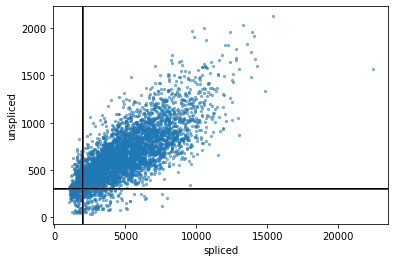

In [11]:
plt.scatter(vlm.initial_cell_size, vlm.initial_Ucell_size, alpha=0.5, s=5)
plt.axvline(2000, c="r", lw=1)
plt.axvline(np.percentile(vlm.initial_cell_size, 8), c="k", lw=1)
plt.axhline(300, c="r", lw=1)
plt.axhline(np.percentile(vlm.initial_Ucell_size, 8), c="k", lw=1)
plt.xlabel("spliced"); plt.ylabel("unspliced")

In [12]:
vlm.filter_cells(bool_array=(vlm.initial_Ucell_size > 300) & (vlm.initial_cell_size > 2000))

In [13]:
# Read column attributes form the loom file and specify colors
colors_dict = {'Endocrine':np.array([137, 34, 81]),
 'Enterocyte.Immature.Distal':np.array([130, 162, 209]),
 'Enterocyte.Immature.Proximal':np.array([224, 139, 183]),
 'Enterocyte.Mature.Distal':np.array([52, 127, 184]),
 'Enterocyte.Mature.Proximal':np.array([150, 81, 156]),
 'Enterocyte.Progenitor':np.array([224, 139, 104]),
 'Enterocyte.Progenitor.Early':np.array([96, 97, 96]),
 'Enterocyte.Progenitor.Late':np.array([107, 194, 165]),
 'Goblet':np.array([225,34,46]),
 'Paneth':np.array([190,190,190]),
 'Stem':np.array([37,139,72]),
 'TA.Early':np.array([249,214,64]),
 'TA.G1':np.array([164,87,44]),
 'TA.G2':np.array([164,209,235]),
 'Tuft':np.array([223,127,49]),
 'TA':np.array([164,87,44]),}
colors_dict = {k:v/256 for k, v in colors_dict.items()}
vlm.ca["Celltype"][np.in1d(vlm.ca["Celltype"], ["TA.G1", "TA.G2"])] = "TA"
vlm.set_clusters(vlm.ca["Celltype"], cluster_colors_dict=colors_dict)

In [14]:
L = list(colors_dict.items())[::-1]

(0.8, 2.0, -1.0, 8.0)

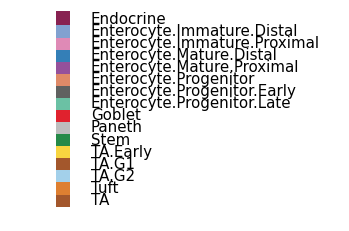

In [15]:
for zz, (k, v) in enumerate(L):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis("off")

In [16]:
cellamount_dict = {'Enterocyte.Immature.Distal': 244,
 'Enterocyte.Immature.Proximal': 144,
 'Enterocyte.Mature.Distal': 148,
 'Enterocyte.Mature.Proximal': 364,
 'Enterocyte.Progenitor': 117,
 'Enterocyte.Progenitor.Early': 489,
 'Enterocyte.Progenitor.Late': 179,
 'Goblet': 269,
 'Paneth': 78,
 'Stem': 666,
 'TA': 458,
 'TA.Early': 270,
 'Tuft': 76,
 'Endocrine': 137}

In [17]:
dict(zip(*np.unique(vlm.ca["Celltype"], return_counts=1))) ==cellamount_dict

True

In [18]:
from scipy.stats.mstats import gmean, hmean

In [19]:
tosample = int(np.ceil(np.mean(np.unique(vlm.ca["Celltype"], return_counts=1)[1])))
np.random.seed(19900715)
downsaple_ixs = []
for ct in np.unique(vlm.ca["Celltype"]):
    ixs = np.where(vlm.ca["Celltype"] == ct)[0]
    downsaple_ixs.append(np.random.choice(ixs, min(tosample, len(ixs)), replace=False))
downsaple_ixs = np.concatenate(downsaple_ixs)
len(downsaple_ixs)

2683

In [20]:
vlm.filter_cells(bool_array=np.in1d(np.arange(vlm.S.shape[1]), downsaple_ixs))

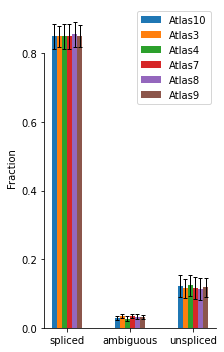

In [21]:
vlm.plot_fractions()

In [22]:
vlm.filter_genes(by_custom_array=~np.in1d(vlm.ra["Gene"], cell_cycle_genes))

In [23]:
vlm.score_detection_levels(min_expr_counts=dp["min_expr_counts"], min_cells_express=dp["min_cells_express"])
vlm.filter_genes(by_detection_levels=True)

In [24]:
# Feature selection - enrichment score
vlm._normalize_S(relative_size=vlm.S.sum(0),
                 target_size=np.median(vlm.S.sum(0)))

M = np.zeros((vlm.S.shape[0], len(np.unique(vlm.cluster_ix))))
F = np.zeros((vlm.S.shape[0], len(np.unique(vlm.cluster_ix))))
for i in np.unique(vlm.cluster_ix):
    D = vlm.S_sz[:, vlm.cluster_ix ==i]
    M[:, i] = D.mean(1)
    F[:, i] = (D>0).mean(1)
Enrich = (M / vlm.S_sz.mean(1)[:,None]) * (F / (vlm.S_sz > 0).mean(1)[:,None])

In [25]:
n = 110
selected = []
for i in np.unique(vlm.cluster_ix):
    selected.append(np.argsort(Enrich[:,i])[::-1][:n])
selected = np.unique(np.concatenate(selected))
selected.shape

(1296,)

In [26]:
vlm.filter_genes(by_custom_array=np.in1d(np.arange(vlm.S.shape[0]), selected))

In [27]:
vlm.score_detection_levels(min_expr_counts=0, min_cells_express=0,
                           min_expr_counts_U=dp["min_expr_counts_U"], min_cells_express_U=dp["min_cells_express_U"])
vlm.score_cluster_expression(min_avg_U=dp["min_avg_U"], min_avg_S=dp["min_avg_S"])
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

In [28]:
combined_size = (vlm.S.sum(0) / np.percentile(vlm.S.sum(0), 95)) + (vlm.initial_cell_size / np.percentile(vlm.initial_cell_size, 95))
combined_Usize = (vlm.U.sum(0) / np.percentile(vlm.U.sum(0), 95)) + (vlm.initial_Ucell_size / np.percentile(vlm.initial_Ucell_size, 95))
vlm._normalize_S(relative_size=0.25*combined_size*np.median(vlm.S.sum(0)),
                 target_size=np.median(vlm.S.sum(0)))
vlm._normalize_U(relative_size=0.5*combined_Usize*np.median(vlm.U.sum(0)),
                 target_size=np.median(vlm.U.sum(0)))

18

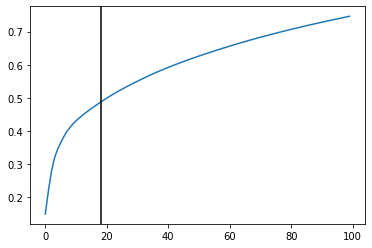

In [29]:
vlm.perform_PCA()
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.006))[0][0]
plt.axvline(n_comps, c="k"); n_comps

Text(0, 0.5, 'PC5')

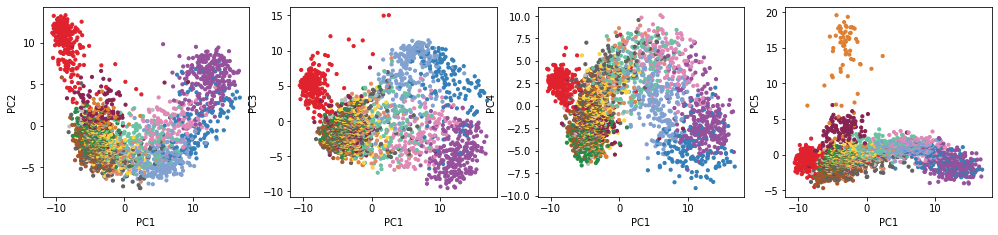

In [30]:
plt.figure(None, (17,3.5))
plt.subplot(141)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,1], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.subplot(142)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,2], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC3")
plt.subplot(143)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,3], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC4")
plt.subplot(144)
vcy.scatter_viz(vlm.pcs[:,0], vlm.pcs[:,4], c=vlm.colorandum,s=10)
plt.xlabel("PC1"); plt.ylabel("PC5")

In [31]:
k = dp["k"] = 70
vlm.knn_imputation(n_pca_dims=9, k=k, balanced=True, b_sight=k*6, b_maxl=int(k*3.5), n_jobs=16)
vlm.fit_gammas(limit_gamma=False, fit_offset=True)

In [32]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_unspliced", delta_t=4)
vlm.extrapolate_cell_at_t(delta_t=1.)

In [33]:
S = set(vlm.ca["Celltype"])
S

{'Endocrine',
 'Enterocyte.Immature.Distal',
 'Enterocyte.Immature.Proximal',
 'Enterocyte.Mature.Distal',
 'Enterocyte.Mature.Proximal',
 'Enterocyte.Progenitor',
 'Enterocyte.Progenitor.Early',
 'Enterocyte.Progenitor.Late',
 'Goblet',
 'Paneth',
 'Stem',
 'TA',
 'TA.Early',
 'Tuft'}

#UMAP

In [34]:
mapper = umap.UMAP().fit(vlm.pcs[:,:9])

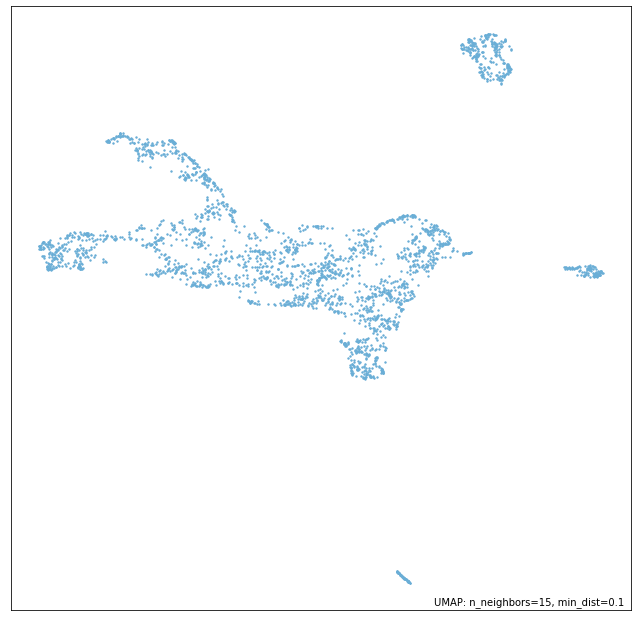

In [35]:
umap.plot.points(mapper)

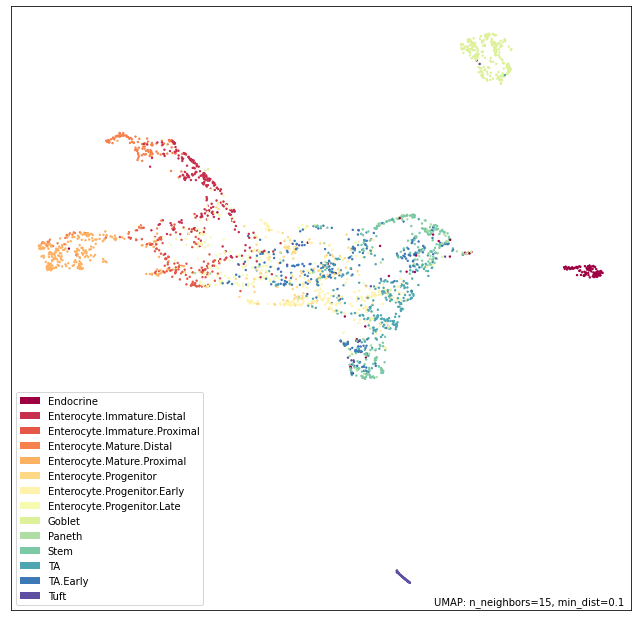

In [36]:
umap.plot.points(mapper, labels=vlm.ca["Celltype"])

In [37]:
reducer = umap.UMAP()

embedding = reducer.fit_transform(vlm.pcs[:,:9])
embedding.shape

(2683, 2)

In [38]:
dict1 = { 'X':embedding[:,0],  'Y':embedding[:,1], 'cell_name':vlm.ca["Celltype"]}
dict1

{'X': array([ 6.7146707,  7.3863707,  7.232044 , ...,  3.1668012,  6.9247766,
        -3.9036806], dtype=float32),
 'Y': array([5.345639 , 2.6911364, 5.050217 , ..., 6.4661474, 3.0372853,
        7.2166824], dtype=float32),
 'cell_name': array(['Enterocyte.Progenitor.Early', 'Enterocyte.Progenitor.Early',
        'Enterocyte.Progenitor.Early', ..., 'TA.Early', 'TA',
        'Enterocyte.Mature.Proximal'], dtype=object)}

In [39]:
embedding

array([[ 6.7146707,  5.345639 ],
       [ 7.3863707,  2.6911364],
       [ 7.232044 ,  5.050217 ],
       ...,
       [ 3.1668012,  6.4661474],
       [ 6.9247766,  3.0372853],
       [-3.9036806,  7.2166824]], dtype=float32)

In [40]:
umap_data = pd.DataFrame(dict1)
umap_data.head(10)

,X,Y,cell_name
0,6.714671,5.345639,Enterocyte.Progenitor.Early
1,7.386371,2.691136,Enterocyte.Progenitor.Early
2,7.232044,5.050217,Enterocyte.Progenitor.Early
3,17.329678,12.916306,Goblet
4,-0.184755,7.695153,Enterocyte.Immature.Proximal
5,0.524618,6.129384,Enterocyte.Immature.Proximal
6,-2.738066,7.359269,Enterocyte.Mature.Proximal
7,5.018423,6.189064,Enterocyte.Progenitor.Early
8,5.143252,5.934272,TA.Early
9,17.670628,13.374835,Goblet


In [41]:
umap_Endocrine1 = umap_data[umap_data['cell_name']=='Endocrine'].values
umap_Enterocyte_Immature_Distal1 = umap_data[umap_data['cell_name']=='Enterocyte.Immature.Distal'].values
umap_Enterocyte_Immature_Proximal1 = umap_data[umap_data['cell_name']=='Enterocyte.Immature.Proximal'].values
umap_Enterocyte_Mature_Distal1 = umap_data[umap_data['cell_name']=='Enterocyte.Mature.Distal'].values
umap_Enterocyte_Mature_Proximal1 = umap_data[umap_data['cell_name']=='Enterocyte.Mature.Proximal'].values
umap_Enterocyte_Progenitor1 = umap_data[umap_data['cell_name']=='Enterocyte.Progenitor'].values
umap_Enterocyte_Progenitor_Early1 = umap_data[umap_data['cell_name']=='Enterocyte.Progenitor.Early'].values
umap_Enterocyte_Progenitor_Late1 = umap_data[umap_data['cell_name']=='Enterocyte.Progenitor.Late'].values
umap_Goblet1 = umap_data[umap_data['cell_name']=='Goblet'].values
umap_Paneth1 = umap_data[umap_data['cell_name']=='Paneth'].values
umap_Stem1 = umap_data[umap_data['cell_name']=='Stem'].values
umap_TA1 = umap_data[umap_data['cell_name']=='TA'].values
umap_TA_Early1 = umap_data[umap_data['cell_name']=='TA.Early'].values
umap_Tuft1 = umap_data[umap_data['cell_name']=='Tuft'].values

In [42]:
X1 = [umap_Endocrine1, umap_Enterocyte_Immature_Distal1 , umap_Enterocyte_Immature_Proximal1, umap_Enterocyte_Mature_Distal1, umap_Enterocyte_Mature_Proximal1,
     umap_Enterocyte_Progenitor1, umap_Enterocyte_Progenitor_Early1, umap_Enterocyte_Progenitor_Late1, umap_Goblet1, umap_Paneth1, umap_Stem1, umap_TA1, 
     umap_TA_Early1, umap_Tuft1]

In [43]:
for n,i in enumerate(X1):
  arr = np.asarray(i)
  rows = ["{},{},{}".format(i, j, k) for i, j, k in arr]
  text = "\n".join(rows)
  with open(str(n)+'umap_sample.csv', 'w') as f:
      f.write(text)

In [44]:
result = umap_data.groupby('cell_name').mean()
print(result)

                                      X          Y
cell_name                                         
Endocrine                      9.724942   9.848380
Enterocyte.Immature.Distal     1.427424   9.818954
Enterocyte.Immature.Proximal   0.479396   6.647380
Enterocyte.Mature.Distal      -0.907538  11.284934
Enterocyte.Mature.Proximal    -2.717015   6.929402
Enterocyte.Progenitor          4.078446   6.215253
Enterocyte.Progenitor.Early    5.248211   5.358160
Enterocyte.Progenitor.Late     2.503394   6.534617
Goblet                        16.791269  12.609591
Paneth                         6.987050   6.025286
Stem                           7.491683   5.716229
TA                             6.806748   4.952589
TA.Early                       5.644891   5.826409
Tuft                           7.730592  -4.763388


(-3.692428994178772,
 17.766683506965638,
 -5.6320371389389035,
 13.478240466117859)

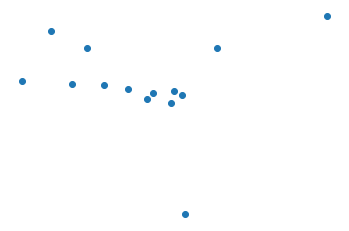

In [45]:
plt.scatter(result['X'], result['Y'])
plt.axis('off')

In [46]:
std1 = umap_data.groupby('cell_name').std()
print(std1)

                                     X         Y
cell_name                                       
Endocrine                     2.373145  2.604567
Enterocyte.Immature.Distal    0.714333  1.712323
Enterocyte.Immature.Proximal  0.805685  0.889520
Enterocyte.Mature.Distal      1.256183  1.945127
Enterocyte.Mature.Proximal    1.101230  0.659450
Enterocyte.Progenitor         1.165677  1.219060
Enterocyte.Progenitor.Early   1.695891  1.364386
Enterocyte.Progenitor.Late    1.384169  1.277135
Goblet                        1.843370  1.159365
Paneth                        1.819780  2.376212
Stem                          0.936852  2.851982
TA                            1.192333  1.393848
TA.Early                      1.718816  1.875276
Tuft                          1.519619  5.351098


In [47]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
labels = label_encoder.fit_transform(vlm.ca["Celltype"])

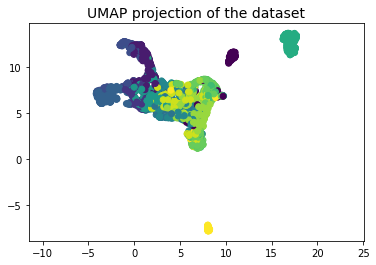

In [48]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=labels)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=14);

In [49]:
vlm.ts = embedding
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=30, knn_random=True, sampled_fraction=0.95,
                             calculate_randomized=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [50]:
vlm.calculate_embedding_shift(sigma_corr = 0.05)
vlm.calculate_grid_arrows(smooth=0.85, steps=(32, 32), n_neighbors=50)

(0.8, 2.0, -1.0, 8.0)

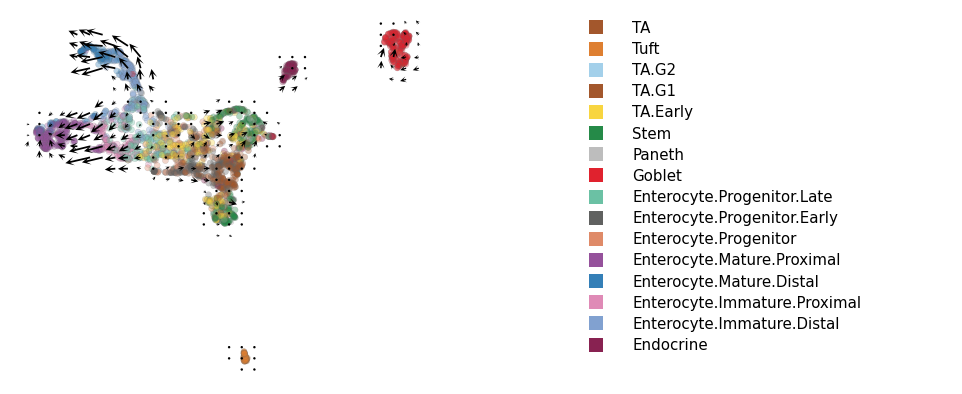

In [51]:
plt.figure(None,(17,7))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=1.4,
                     scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True},
                     min_mass=5.5, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                     plot_random=False, scale_type="relative")
plt.subplot(122)
for zz, (k, v) in enumerate(L[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis("off")

#t-SNE

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2683 samples in 0.004s...
[t-SNE] Computed neighbors for 2683 samples in 0.147s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2683
[t-SNE] Computed conditional probabilities for sample 2000 / 2683
[t-SNE] Computed conditional probabilities for sample 2683 / 2683
[t-SNE] Mean sigma: 1.987896
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.337128
[t-SNE] KL divergence after 300 iterations: 1.327994


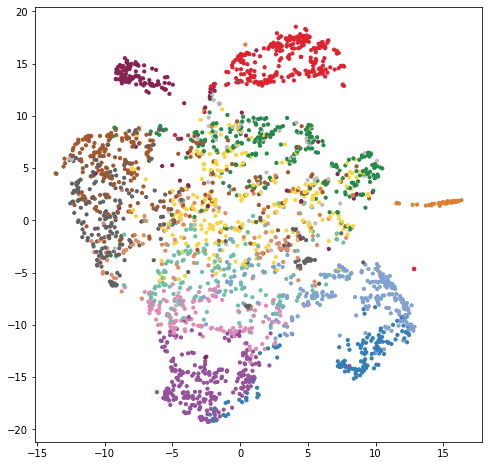

In [52]:
ts =  TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = ts.fit_transform(vlm.pcs[:,:9])
plt.figure(None,(8,8))
vcy.scatter_viz(tsne_results[:,0], tsne_results[:,1], c=vlm.colorandum, s=10)

In [53]:
dict2 = { 'X':tsne_results[:,0],  'Y':tsne_results[:,1], 'cell_name':vlm.ca["Celltype"]}
dict2

{'X': array([ -8.598256 ,  -5.851234 , -10.876217 , ...,  -1.9222674,
         -6.9188704,  -2.9946353], dtype=float32),
 'Y': array([  3.5452788,   8.767926 ,   4.6328254, ...,  -3.302177 ,
          8.194625 , -18.87077  ], dtype=float32),
 'cell_name': array(['Enterocyte.Progenitor.Early', 'Enterocyte.Progenitor.Early',
        'Enterocyte.Progenitor.Early', ..., 'TA.Early', 'TA',
        'Enterocyte.Mature.Proximal'], dtype=object)}

In [54]:
tsne_data = pd.DataFrame(dict2)
tsne_data.head(10)

,X,Y,cell_name
0,-8.598256,3.545279,Enterocyte.Progenitor.Early
1,-5.851234,8.767926,Enterocyte.Progenitor.Early
2,-10.876217,4.632825,Enterocyte.Progenitor.Early
3,2.792312,16.956026,Goblet
4,0.691835,-10.426976,Enterocyte.Immature.Proximal
5,-4.722511,-8.952476,Enterocyte.Immature.Proximal
6,-1.073670,-15.380281,Enterocyte.Mature.Proximal
7,-5.694955,0.348841,Enterocyte.Progenitor.Early
8,-4.444366,0.743239,TA.Early
9,3.985169,17.294239,Goblet


In [55]:
tsne_Endocrine1 = tsne_data[tsne_data['cell_name']=='Endocrine'].values
tsne_Enterocyte_Immature_Distal1 = tsne_data[tsne_data['cell_name']=='Enterocyte.Immature.Distal'].values
tsne_Enterocyte_Immature_Proximal1 = tsne_data[tsne_data['cell_name']=='Enterocyte.Immature.Proximal'].values
tsne_Enterocyte_Mature_Distal1 = tsne_data[tsne_data['cell_name']=='Enterocyte.Mature.Distal'].values
tsne_Enterocyte_Mature_Proximal1 = tsne_data[tsne_data['cell_name']=='Enterocyte.Mature.Proximal'].values
tsne_Enterocyte_Progenitor1 = tsne_data[tsne_data['cell_name']=='Enterocyte.Progenitor'].values
tsne_Enterocyte_Progenitor_Early1 = tsne_data[tsne_data['cell_name']=='Enterocyte.Progenitor.Early'].values
tsne_Enterocyte_Progenitor_Late1 = tsne_data[tsne_data['cell_name']=='Enterocyte.Progenitor.Late'].values
tsne_Goblet1 = tsne_data[tsne_data['cell_name']=='Goblet'].values
tsne_Paneth1 = tsne_data[tsne_data['cell_name']=='Paneth'].values
tsne_Stem1 = tsne_data[tsne_data['cell_name']=='Stem'].values
tsne_TA1 = tsne_data[tsne_data['cell_name']=='TA'].values
tsne_TA_Early1 = tsne_data[tsne_data['cell_name']=='TA.Early'].values
tsne_Tuft1 = tsne_data[tsne_data['cell_name']=='Tuft'].values

In [56]:
X2 = [tsne_Endocrine1, tsne_Enterocyte_Immature_Distal1 , tsne_Enterocyte_Immature_Proximal1, tsne_Enterocyte_Mature_Distal1, tsne_Enterocyte_Mature_Proximal1,
     tsne_Enterocyte_Progenitor1, tsne_Enterocyte_Progenitor_Early1, tsne_Enterocyte_Progenitor_Late1, tsne_Goblet1, tsne_Paneth1, tsne_Stem1, tsne_TA1, 
     tsne_TA_Early1, tsne_Tuft1]

In [57]:
for n,i in enumerate(X2):
  arr = np.asarray(i)
  rows = ["{},{},{}".format(i, j, k) for i, j, k in arr]
  text = "\n".join(rows)
  with open(str(n)+'tsne_sample.csv', 'w') as f:
      f.write(text)

In [58]:
result2 = tsne_data.groupby('cell_name').mean()
print(result2)

                                      X          Y
cell_name                                         
Endocrine                     -5.923522  11.712447
Enterocyte.Immature.Distal     7.632138  -7.193831
Enterocyte.Immature.Proximal  -2.561881  -9.155263
Enterocyte.Mature.Distal       7.544077 -13.222531
Enterocyte.Mature.Proximal    -2.544090 -15.326616
Enterocyte.Progenitor         -2.540660  -2.064715
Enterocyte.Progenitor.Early   -6.801756   0.268642
Enterocyte.Progenitor.Late    -1.118137  -4.904982
Goblet                         3.391587  15.187263
Paneth                         1.552190   5.141168
Stem                           3.438310   6.247867
TA                            -6.481460   4.739302
TA.Early                       0.401255   1.747746
Tuft                          12.728454   1.936137


In [59]:
result2.index

Index(['Endocrine', 'Enterocyte.Immature.Distal',
       'Enterocyte.Immature.Proximal', 'Enterocyte.Mature.Distal',
       'Enterocyte.Mature.Proximal', 'Enterocyte.Progenitor',
       'Enterocyte.Progenitor.Early', 'Enterocyte.Progenitor.Late', 'Goblet',
       'Paneth', 'Stem', 'TA', 'TA.Early', 'Tuft'],
      dtype='object', name='cell_name')

In [60]:
text = result2.index[1]
text

'Enterocyte.Immature.Distal'

(-7.778266882896423, 13.704964137077331, -16.85231022834778, 16.71295647621155)

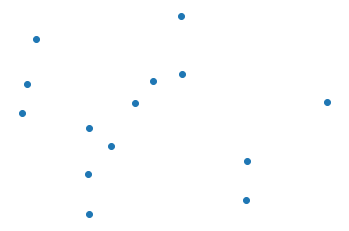

In [61]:
plt.scatter(result2['X'], result2['Y'])
plt.axis('off')

In [62]:
std2 = umap_data.groupby('cell_name').std()
print(std2)

                                     X         Y
cell_name                                       
Endocrine                     2.373145  2.604567
Enterocyte.Immature.Distal    0.714333  1.712323
Enterocyte.Immature.Proximal  0.805685  0.889520
Enterocyte.Mature.Distal      1.256183  1.945127
Enterocyte.Mature.Proximal    1.101230  0.659450
Enterocyte.Progenitor         1.165677  1.219060
Enterocyte.Progenitor.Early   1.695891  1.364386
Enterocyte.Progenitor.Late    1.384169  1.277135
Goblet                        1.843370  1.159365
Paneth                        1.819780  2.376212
Stem                          0.936852  2.851982
TA                            1.192333  1.393848
TA.Early                      1.718816  1.875276
Tuft                          1.519619  5.351098


In [63]:
vlm.ts = tsne_results
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1, n_neighbors=30, knn_random=True, sampled_fraction=0.95, calculate_randomized=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [64]:
vlm.calculate_embedding_shift(sigma_corr = 0.05)
vlm.calculate_grid_arrows(smooth=0.85, steps=(32, 32), n_neighbors=50)

(0.8, 2.0, -1.0, 8.0)

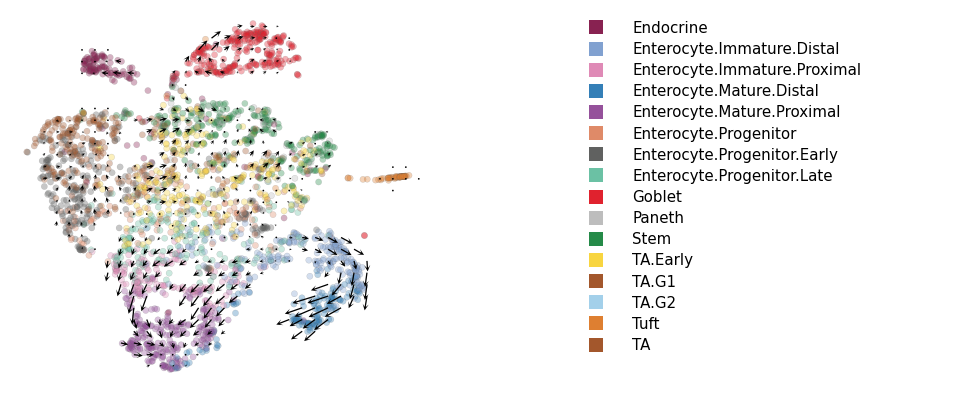

In [65]:
plt.figure(None,(17,7))
plt.subplot(121)
vlm.plot_grid_arrows(quiver_scale=1.4,
                     scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True},
                     min_mass=5.5, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                     plot_random=False, scale_type="relative")
plt.subplot(122)
for zz, (k, v) in enumerate(list(colors_dict.items())[::-1]):
    plt.scatter(1, zz/2., c=v, marker="s", lw=0., edgecolor="k", s=220)
    plt.text(1.1, zz/2., k, fontdict={"va":"center", "size":15})
plt.xlim(0.8,2)
plt.ylim(-1,8)
plt.axis("off")